<a href="https://colab.research.google.com/github/Chung-collab/GREAT-LAB/blob/main/GIS_data_on_basemap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mapping GIS data on different basemaps can highlight the spatial relationship between the data and geographical identities, such as streets or contours. Here provides two examples showing housing estates' locations on an Open Street Map and on a Terrain Map:
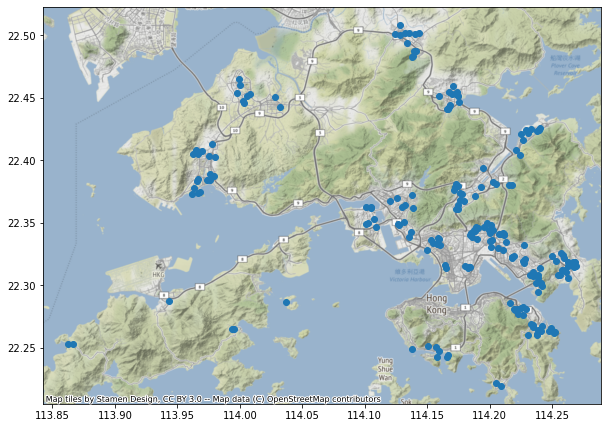

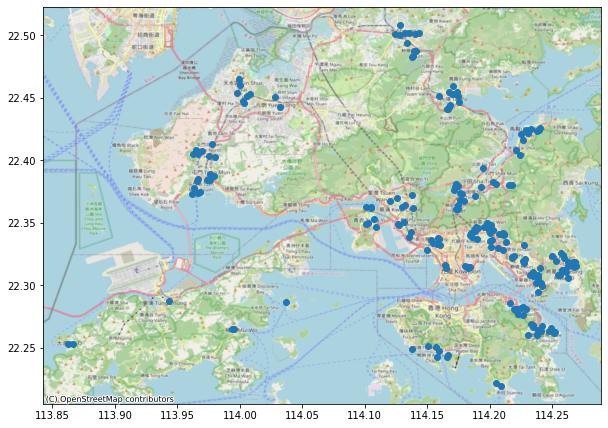 

In [ ]:
# plot GIS data on different basemaps by geopandas and contextily
# see https://colab.research.google.com/github/bwsi-hadr/03-Intro-to-GIS/blob/master/03_Intro_to_GIS.ipynb#scrollTo=aOtbuNGUTB7k
!pip install geopandas
!pip install contextily
import geopandas as gpd
import contextily as ctx # for basemaps
from shapely.geometry import Point, LineString, Polygon
from matplotlib import pyplot as plt

     |████████████████████████████████| 1.0MB 4.9MB/s 
     |████████████████████████████████| 15.4MB 188kB/s 
     |████████████████████████████████| 6.6MB 32.2MB/s 
     |████████████████████████████████| 19.3MB 40.0MB/s 


In [ ]:
#get a shape file 
#Hong Kong shp file from https://opendata.esrichina.hk/
from google.colab import drive
drive.mount('/content/drive/')
#filepath = "Home_Ownership_Scheme_Courts_in_Hong_Kong.shp"
data = gpd.read_file("drive/MyDrive/Colab Notebooks/Home_Ownership_Scheme_Courts_in_Hong_Kong.shp")
data.head()

Mounted at /content/drive/


,OBJECTID,Estate_Nam,Estate_N_1,District_N,District_1,Region_Nam,Region_N_1,The_map_la,The_map_lo,Sold_Under,Sold_Und_1,Year_of_Co,Type_s__of,Type_s___1,No__of_Blo,Name_of_Bl,Name_of__1,No__of_Fla,Gross_Floo,Saleable_A,Initial_Sa,Owners__Co,Owners___1,Regional_M,Regional_1,Property_M,Property_1,Carpark_Ma,Carpark__1,Court_Webs,Further_In,Further__1,geometry
0,1,Elegance Garden,富雅花園,Tai Po,大埔,New Territories East,新界東,22.44446,114.1678,12A,第十二期甲,1990.0,Private Sector Participation Scheme,私人機構參建居屋計劃,4,Block 1 - Block 4,第一座至第四座,1 060,47 - 65,40 - 55,342900 - 580000,Formed,已成立,"Tai Po, North & Shatin District Tenancy Manage...",大埔、北區及沙田區租約事務管理處(七)\n 新界大埔太和邨安和樓2樓\n 電話：2657...,Appointed by Owners' Corporation,<業主立案法團委派>,-,-,-,-,-,POINT Z (114.16780 22.44446 0.00000)
1,2,Tak Nga Court,德雅苑,Tai Po,大埔,New Territories East,新界東,22.44086,114.1658,13C,第十三期丙,1992.0,Trident,Y型,1,Tak Nga Court,德雅苑,816,46 - 64,35 - 49,392000 - 648500,Formed,已成立,"Tai Po, North & Shatin District Tenancy Manage...",大埔、北區及沙田區租約事務管理處(七)\n 新界大埔太和邨安和樓2樓\n 電話：2657...,Appointed by Owners' Corporation\n,<由業主立案法團委派>,-,-,-,-,-,POINT Z (114.16580 22.44086 0.00000)
2,3,Tai Po Plaza,大埔廣場,Tai Po,大埔,New Territories East,新界東,22.45287,114.1699,6A,第六期甲,1985.0,Private Sector Participation Scheme,私人機構參建居屋計劃,5,Yee Fai Court\nYee Fu Court\nYee Hing Court\nY...,宜輝閣\n 宜富閣\n 宜興閣\n 宜盛閣\n 宜德閣,1 408,41 - 53,34 - 45,156500 - 248800,Formed,已成立,"Tai Po, North & Shatin District Tenancy Manage...",大埔、北區及沙田區租約事務管理處(七)\n 新界大埔太和邨安和樓2樓\n 電話：2657...,Appointed by Owners' Corporation,<業主立案法團委派>,-,-,-,-,-,POINT Z (114.16990 22.45287 0.00000)
3,4,Ting Nga Court,汀雅苑,Tai Po,大埔,New Territories East,新界東,22.45493,114.1670,2B,第二期乙,1981.0,Old-Cruciform,舊十字型,3,Nga Yin House\nNga Man House\nNga Kwan House,雅賢閣\n 雅文閣\n 雅群閣,395,55 - 62,46 - 52,156800 - 209500,Formed,已成立,"Tai Po, North & Shatin District Tenancy Manage...",大埔區租約事務管理處(一)\n 新界大埔太和邨安和樓2樓\n 電話：2657 2808\...,Appointed by Owners' Corporation\n,<由業主立案法團委派>,Hong Yip Service Company Ltd.,康業服務有限公司,-,-,-,POINT Z (114.16700 22.45493 0.00000)
4,5,Yat Nga Court,逸雅苑,Tai Po,大埔,New Territories East,新界東,22.44285,114.1674,12B,第十二期乙,1991.0,Trident 4,Y4型,2,Yat Wing House\nYat Yan House,逸榮閣\n 逸欣閣,1 224,46 - 70,34 - 52,295400 - 552200,Formed,已成立,"Tai Po, North & Shatin District Tenancy Manage...",大埔、北區及沙田區租約事務管理處(七)\n 新界大埔太和邨安和樓2樓 \n 電話：265...,Appointed by Owners' Corporation\n,<由業主立案法團委派>,-,-,-,-,-,POINT Z (114.16740 22.44285 0.00000)


(22.2, 22.55)

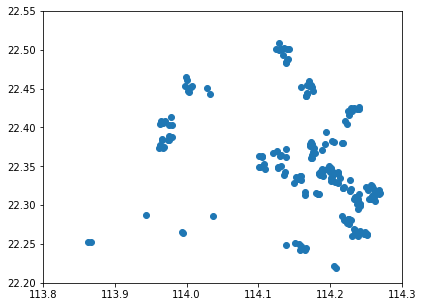

In [ ]:
#plot the GIS data by coordinates
ax = data.plot(figsize=(10,5))
ax.set_xlim([113.8,114.3])
ax.set_ylim([22.20,22.55])

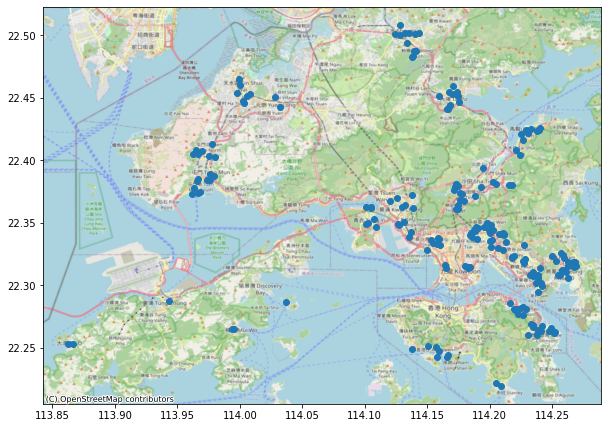

In [ ]:
#use a basemap of OpenStreetMap.Mapnik
ax = data.plot(figsize=(10,10), legend=True)
ctx.add_basemap(ax, crs=data.crs, source=ctx.providers.OpenStreetMap.Mapnik)

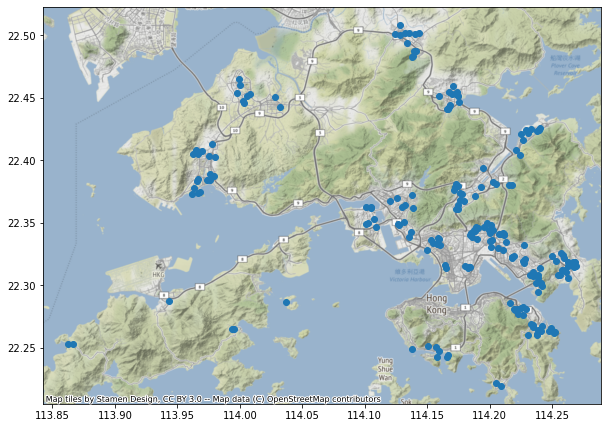

In [ ]:
#use another basemap Stamen.Terrain
ax = data.plot(figsize=(10,10), legend=True)
ctx.add_basemap(ax, crs=data.crs, source=ctx.providers.Stamen.Terrain)

More examples: here is the website showing how to plot the Earthquakes>4.5 in the past 30 days in the world. 
https://www.stat.berkeley.edu/~nelle/teaching/2017-visualization/README.html

Here I show one more example of mapping shaped areas rather than dots on a basemap by using the Wellington Quake Risk Zones GIS data

In [7]:
#get a shape file 
#Wellington Quake Risk Zones shp file from https://data-gwrc.opendata.arcgis.com/datasets/GWRC::wellington-region-ground-shaking-hazard-zones/about
from google.colab import drive
drive.mount('/content/drive')
data = gpd.read_file("drive/MyDrive/Colab Notebooks/Wellington_Region_Ground_Shaking_Hazard_Zones.shp")
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,OBJECTID,TEMPGS_ID,ZONE,SEVERITY,Shapearea,Shapelen,geometry
0,1,2,2,2,2.215367e+06,15935.271505,"POLYGON ((1783711.932 5489327.998, 1783725.684..."
1,2,3,3,3 Moderate,4.280815e+03,284.113999,"POLYGON ((1784180.225 5489330.000, 1784178.225..."
2,3,3,3,3 Moderate,1.013375e+05,2547.020650,"POLYGON ((1783533.416 5489329.498, 1783535.166..."
3,4,3,3,3 Moderate,5.132773e+03,304.428199,"POLYGON ((1783796.440 5489326.499, 1783803.941..."
4,5,3,3,3 Moderate,1.781542e+06,16459.494866,"POLYGON ((1782758.597 5489325.995, 1782764.347..."


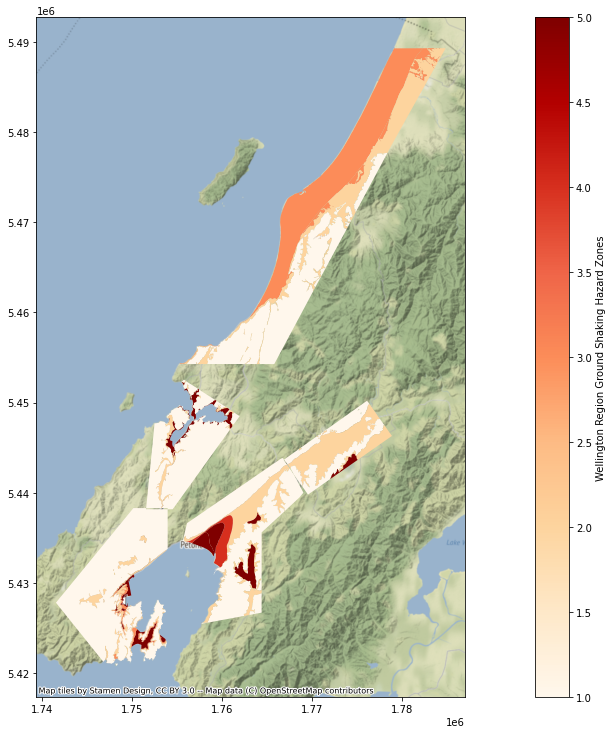

In [8]:
ax=data.plot(column="ZONE", figsize=(25,12.5), cmap='OrRd', legend=True, legend_kwds={'label': "Wellington Region Ground Shaking Hazard Zones", 'orientation': "vertical"})
ctx.add_basemap(ax, crs=data.crs, source=ctx.providers.Stamen.Terrain)